In [9]:
##IMPORT PACKAGES###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

In [2]:
###LOAD IN DATA###
df = pd.read_csv(r"C:\Users\Vinnie\Downloads\heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


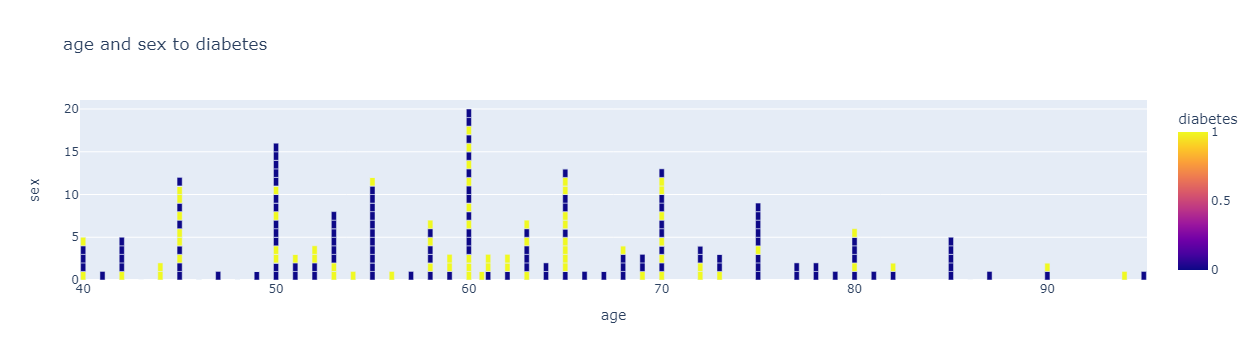

In [11]:
###PLOT###
fig = px.bar(df, x="age", y="sex", color="diabetes", title="age and sex to diabetes")
fig.show()

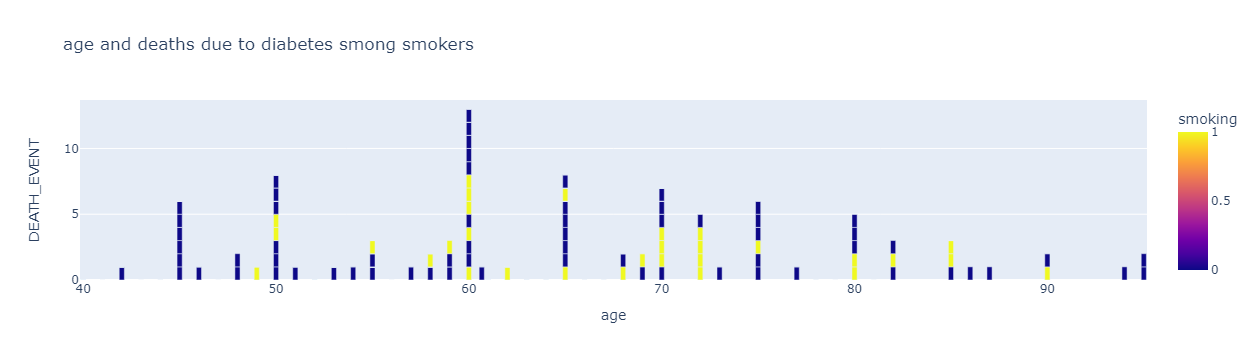

In [13]:
###PLOT###
fig = px.bar(df, x="age", y="DEATH_EVENT", color="smoking", title="age and deaths due to diabetes smong smokers")
fig.show()

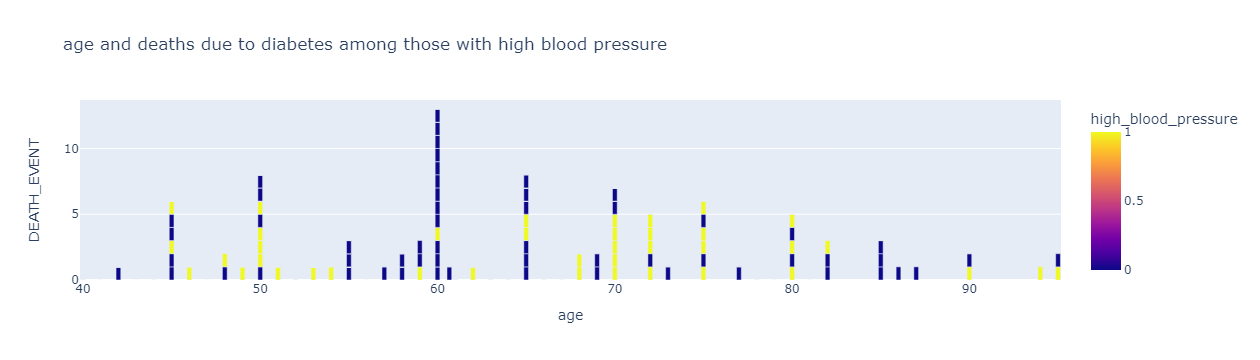

In [14]:
###PLOT###
fig = px.bar(df, x="age", y="DEATH_EVENT", color="high_blood_pressure", title="age and deaths due to diabetes among those with high blood pressure")
fig.show()

In [15]:
###Scaling dataset to drop the death event in order to predict it later###
scaler = StandardScaler()
scaler.fit(df.drop('DEATH_EVENT', axis=1))
scaledVariables = scaler.transform(df.drop('DEATH_EVENT',axis=1))
dfScaled = pd.DataFrame(scaledVariables, columns=df.columns[:-1])

In [16]:
##Defining x as the df dataset defined above which doesn't include death event##
##Defining y as death event from the df dataframe which we scaled and called dfScaled##
x = dfScaled
y = df['DEATH_EVENT']

In [17]:
##Fitting training size to 70% of the data and test size to 30% of the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [18]:
#Beginning KNN analysis###
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [19]:
###Developing classification report###
print(confusion_matrix(y_test, pred))

[[47 15]
 [16 12]]


In [20]:
###75% accuracy with a 75% f1 score, 3/4 of the data was classified with its correct death event###
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        62
           1       0.44      0.43      0.44        28

    accuracy                           0.66        90
   macro avg       0.60      0.59      0.59        90
weighted avg       0.65      0.66      0.65        90



In [21]:
###CHOOSING THE BEST MODEL AND DEFINING ERROR RATE###
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

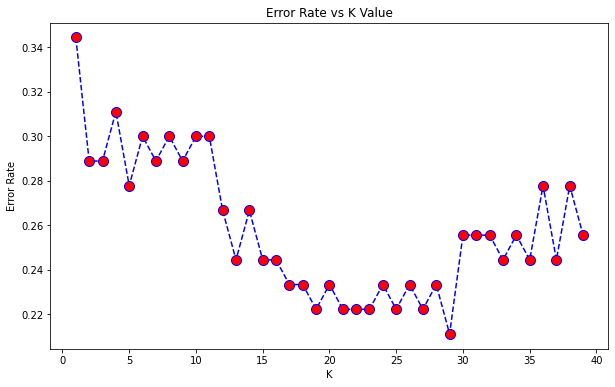

In [22]:
###PLOTTING ERROR RATE AND K MEANS VALUE###
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')